In [1]:
!pip install scvi-tools

In [2]:
!pip install scanpy

In [3]:
import os
import tempfile

import scanpy as sc
import scvi
import seaborn as sns
import torch

In [4]:
save_dir = tempfile.TemporaryDirectory()

In [5]:
adata = scvi.data.heart_cell_atlas_subsampled(save_path=save_dir.name)
adata

INFO     Downloading file at /tmp/tmpy4166mqg/hca_subsampled_20k.h5ad                                              


Downloading...:   0%|          | 0/65714.0 [00:00<?, ?it/s]

AnnData object with n_obs × n_vars = 18641 × 26662
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'n_counts'
    uns: 'cell_type_colors'

In [6]:
sc.pp.filter_genes(adata, min_counts=3)

In [7]:
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

In [8]:
!pip install --user scikit-misc

In [9]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=1200,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="cell_source",
)

In [10]:
adata.obs

,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,source,type,version,cell_states,Used
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,LA,HCAHeart7844001,0.113475,CD45+,DCD,V2,LYVE1+MØ1,Yes
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,RV,HCAHeart7829979,0.085546,Nuclei,DCD,V2,vCM1,Yes
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,RA,HCAHeart7702879,0.197861,Nuclei,DCD,V2,FB2,Yes
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,LA,HCAHeart8102858,0.113475,CD45+,DCD,V3,EC10_CMC-like,Yes
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,RA,HCAHeart8102863,0.132150,Cells,DCD,V3,EC5_art,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,RV,HCAHeart7985087,0.185751,Nuclei,DBD,V2,vCM1,Yes
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,RV,H0035_RV,0.081779,Nuclei,DBD,V3,PC1_vent,Yes
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,LA,HCAHeart7844001,0.074830,CD45+,DCD,V2,CD4+T_tem,Yes
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,LA,HCAHeart7702876,0.048649,Nuclei,DCD,V2,aCM3,Yes


In [11]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["cell_source", "donor"],
  continuous_covariate_keys=["percent_mito", "percent_ribo"],
)

In [12]:
model = scvi.model.SCVI(adata)

In [13]:
model.train(max_epochs=40)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Training:   0%|          | 0/40 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=40` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=40` reached.


In [14]:
model_dir = os.path.join(save_dir.name, "scvi_model")
model.save(model_dir, overwrite=True)

In [15]:
SCVI_LATENT_KEY = "X_scVI"

latent = model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(18641, 10)

In [16]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata)

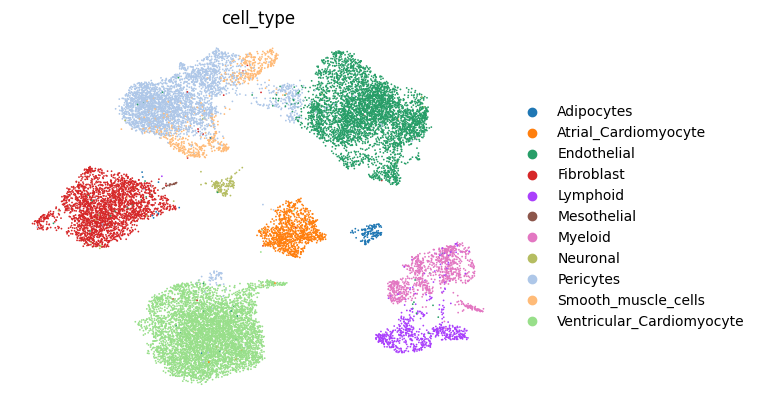

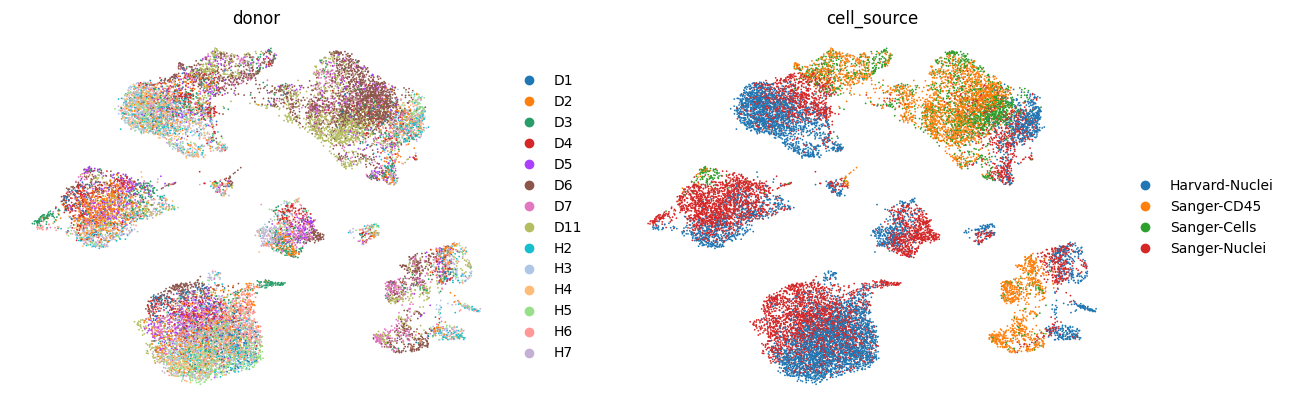

In [17]:
sc.pl.umap(
    adata,
    color=["cell_type"],
    frameon=False,
)
sc.pl.umap(
    adata,
    color=["donor", "cell_source"],
    ncols=2,
    frameon=False,
)

In [18]:
from sklearn.metrics import silhouette_score

# Assuming you're using PCA or UMAP as the embedding for silhouette score calculation
# Use adata.obsm['X_pca'] or adata.obsm['X_umap'] for the feature space
X = adata.obsm['X_scVI']  # or 'X_umap', choose an appropriate embedding

# Get the clusters from adata.obs
labels = adata.obs['cell_type']

# Calculate silhouette score
sil_score = silhouette_score(X, labels)
print(f'Silhouette score: {sil_score}')

Silhouette score: 0.29786768555641174


In [20]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.4 MB/s eta 0:00:00


In [22]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.1 MB/s eta 0:00:00


In [24]:
import leidenalg

In [25]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Store silhouette scores for different resolutions
resolutions = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
silhouette_scores = []

# Loop over different Leiden resolutions
for res in resolutions:
    # Perform Leiden clustering at the given resolution
    sc.tl.leiden(adata, resolution=res)

    # Calculate silhouette score using the PCA embedding
    sil_score = silhouette_score(adata.obsm['X_scVI'], adata.obs['leiden'])

    # Append the result to the list
    silhouette_scores.append(sil_score)
    print(f"Resolution {res}: Silhouette score = {sil_score}")

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'resolution': resolutions,
    'silhouette_score': silhouette_scores
})

# Step 3: Plot the silhouette scores as a barplot
plt.figure(figsize=(8, 5))
plt.bar(results_df['resolution'], results_df['silhouette_score'], width=0.05)
plt.xlabel('Leiden Resolution')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Leiden Resolutions')
plt.show()

<ipython-input-25-b5e572c7e1fa>:11: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=res)


Resolution 0.5: Silhouette score = 0.20265083014965057
Resolution 0.6: Silhouette score = 0.19848892092704773
Resolution 0.7: Silhouette score = 0.19718711078166962
Resolution 0.8: Silhouette score = 0.18105487525463104
Resolution 0.9: Silhouette score = 0.15686197578907013
Resolution 1.0: Silhouette score = 0.1561661958694458


NameError: name 'pd' is not defined

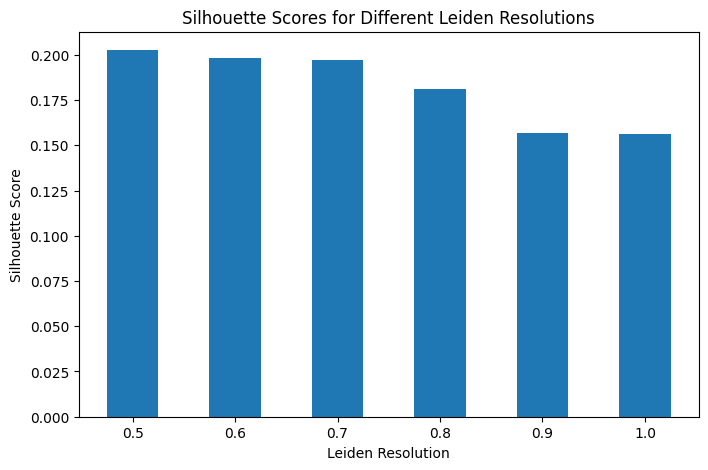

In [26]:
import pandas as pd
# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'resolution': resolutions,
    'silhouette_score': silhouette_scores
})

# Step 3: Plot the silhouette scores as a barplot
plt.figure(figsize=(8, 5))
plt.bar(results_df['resolution'], results_df['silhouette_score'], width=0.05)
plt.xlabel('Leiden Resolution')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Leiden Resolutions')
plt.show()